## **Downloading the libraries:**

In [0]:
#zero line : we disable Jupyter's autosave
#First and second line : we always obtain updated functions, classes, methods..   (last version) from a specific library
#Third line : memorize the graph in the notebook file
%autosave 0
%reload_ext autoreload 
%autoreload 2 
%matplotlib inline 

In [0]:
from fastai.vision import *

## **Obtaining data:**


#### Downloading data trought Kaggle API

In [0]:
#Before to run the two lines of code drag and drop the kaggle.json file into the working directory (/content)--->default path when you open Colab
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [0]:
path = Config.data_path()/'bird'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/bird')

In [0]:
!chmod 600 /root/.kaggle/kaggle.json  #to fix the warning "Your Kaggle API key is readable by other users on this system..."

In [0]:
!kaggle competitions list --csv # we test if we are connected to Kaggle API. We print the list of opened competitions

ref,deadline,category,reward,teamCount,userHasEntered
digit-recognizer,2030-01-01 00:00:00,Getting Started,Knowledge,2223,False
titanic,2030-01-01 00:00:00,Getting Started,Knowledge,17071,False
house-prices-advanced-regression-techniques,2030-01-01 00:00:00,Getting Started,Knowledge,4620,False
connectx,2030-01-01 00:00:00,Getting Started,Knowledge,309,False
nlp-getting-started,2030-01-01 00:00:00,Getting Started,Kudos,3295,False
competitive-data-science-predict-future-sales,2020-12-31 23:59:00,Playground,Kudos,6084,False
m5-forecasting-accuracy,2020-06-30 23:59:00,Featured,"$50,000",1495,False
m5-forecasting-uncertainty,2020-06-30 23:59:00,Featured,"$50,000",95,False
jigsaw-multilingual-toxic-comment-classification,2020-06-22 23:59:00,Featured,"$50,000",203,False
tweet-sentiment-extraction,2020-06-02 23:59:00,Featured,"$15,000",241,False
imet-2020-fgvc7,2020-05-28 23:59:00,Research,Knowledge,5,False
abstraction-and-reasoning-challenge,2020-05-27 23:59:00,Research,"$20,000",520,False
im

In [0]:
!kaggle competitions download -c multilabel-bird-species-classification-nips2013 -p {path} --force #we download the file in our path

 98% 133M/135M [00:01<00:00, 87.3MB/s]
100% 135M/135M [00:01<00:00, 117MB/s] 
 96% 153M/159M [00:01<00:00, 84.1MB/s]
100% 159M/159M [00:01<00:00, 91.6MB/s]
 56% 5.00M/9.00M [00:00<00:00, 21.0MB/s]
100% 9.00M/9.00M [00:00<00:00, 34.8MB/s]


#### Decompressing files and directories eploration

In [0]:
!ls /root/.fastai/data/bird  #ls--> shell command to see the file into a specific directory

NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz


In [0]:
!python -m tarfile -e {path}/NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar /root/.fastai/data/bird  #decompressing NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar

In [0]:
!ls /root/.fastai/data/bird

NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS
NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz


In [0]:
!python -m tarfile -e {path}/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz /root/.fastai/data/bird #decompressing NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz


In [0]:
!ls /root/.fastai/data/bird


NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS
NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz


In [0]:
!ls /root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV  #eplore our directory with wav files

test  train


In [0]:
!ls /root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train | head -10   #print first 10 lines inside NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train dirtectory

nips4b_birds_trainfile001.wav
nips4b_birds_trainfile002.wav
nips4b_birds_trainfile003.wav
nips4b_birds_trainfile004.wav
nips4b_birds_trainfile005.wav
nips4b_birds_trainfile006.wav
nips4b_birds_trainfile007.wav
nips4b_birds_trainfile008.wav
nips4b_birds_trainfile009.wav
nips4b_birds_trainfile010.wav


In [0]:
!ls /root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train | tail -10   #print last 10 lines inside NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train dirtectory

nips4b_birds_trainfile678.wav
nips4b_birds_trainfile679.wav
nips4b_birds_trainfile680.wav
nips4b_birds_trainfile681.wav
nips4b_birds_trainfile682.wav
nips4b_birds_trainfile683.wav
nips4b_birds_trainfile684.wav
nips4b_birds_trainfile685.wav
nips4b_birds_trainfile686.wav
nips4b_birds_trainfile687.wav


In [0]:
!ls {path}/NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS  #explore NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS

example_NIPS4B13_submission_format_test_prediction.csv
Kaggle_BIRD_challenge_NIPS_MFCCcomputation.m
nips4b_birdchallenge_espece_list.csv
nips4b_birdchallenge_espece_list.html
nips4b_birdchallenge_espece_list.xls
nips4b_birdchallenge_train_labels.csv
nips4b_birdchallenge_train_labels.html
nips4b_birdchallenge_train_labels.xls
numero_file_train.csv
numero_file_train.txt
octave-core
README.txt
tps_canaux_sr_nbits_TRAIN.csv


In [0]:
#we want to open README.txt file
DescriptionTXT = open("/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS/README.txt","r+")

In [0]:
print(DescriptionTXT.read())

Note to participants:

This README file provides a short description of each file of NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS folder.

%%%%%%%%%%%%%%%
Kaggle_BIRD_challenge_NIPS_MFCCcomputation.m

This matlab script has been used to compute cepstra from wav files. Cestra can be downloaded to: 
sabiod.univ-tln.fr/nips4b/media/birds/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz

%%%%%%%%%%%%%%%
nips4b_birdchallenge_train_labels.*

is a more aesthetic and complete version of numero_file_train.csv.

%%%%%%%%%%%%%%%
numero_file_train.csv
numero_file_train.txt

This 2 files contain (respectively to format csv and ascii) the same 687 x 89 matrix (lines x colums).
First column correspond to the number of a train file.
Each column from n°2 to n°88 inform by 0 or 1 respectively the absence or presence of a given species.
According to nips4b_birdchallenge_train_labels.* file,
-column n°2 correspond to the class labeled '1' ('Aegcau_call');
-column n°3 correspond to the class labeled '2' ('Alaarv_song');

## **Transforming label tabel**

In [0]:
#We convert nips4b_birdchallenge_train_labels.csv to dataframe
df = pd.read_csv(path/'NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS/nips4b_birdchallenge_train_labels.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,NaN,NaN,NaN,class name >,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,Carcar_call,Carcar_song,Cerbra_call,Cerbra_song,Cetcet_song,Chlchl_call,Cicatr_song,Cicorn_song,Cisjun_song,Colpal_song,Corcor_call,Denmaj_call,Denmaj_drum,Embcir_call,Embcir_song,Erirub_call,Erirub_song,Fricoe_call,Fricoe_song,Galcri_call,Galcri_song,Galthe_call,Galthe_song,Gargla_call,Hirrus_call,Jyntor_song,Lopcri_call,Loxcur_call,Lularb_song,Lusmeg_call,...,Parmaj_song,Pasdom_call,Pelgra_call,Petpet_call,Petpet_song,Phofem_song,Phycol_call,Phycol_song,Picpic_call,Plaaff_song,Plasab_song,Poepal_call,Poepal_song,Prumod_song,Ptehey_song,Pyrpyr_call,Regign_call,Regign_song,Serser_call,Serser_song,Siteur_call,Siteur_song,Strdec_song,Strtur_song,Stuvul_call,Sylatr_call,Sylatr_song,Sylcan_call,Sylcan_song,Sylmel_call,Sylmel_song,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song
1,Filename,card_species,Empty,class number >,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
2,nips4b_birds_trainfile001.wav,3,NaN,­,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nips4b_birds_trainfile002.wav,1,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nips4b_birds_trainfile003.wav,2,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = df.drop(['Unnamed: 1','Unnamed: 3'],axis=1)   #We drop column 1 and 3
df.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,NaN,NaN,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,Carcar_call,Carcar_song,Cerbra_call,Cerbra_song,Cetcet_song,Chlchl_call,Cicatr_song,Cicorn_song,Cisjun_song,Colpal_song,Corcor_call,Denmaj_call,Denmaj_drum,Embcir_call,Embcir_song,Erirub_call,Erirub_song,Fricoe_call,Fricoe_song,Galcri_call,Galcri_song,Galthe_call,Galthe_song,Gargla_call,Hirrus_call,Jyntor_song,Lopcri_call,Loxcur_call,Lularb_song,Lusmeg_call,Lusmeg_song,Lyrple_song,...,Parmaj_song,Pasdom_call,Pelgra_call,Petpet_call,Petpet_song,Phofem_song,Phycol_call,Phycol_song,Picpic_call,Plaaff_song,Plasab_song,Poepal_call,Poepal_song,Prumod_song,Ptehey_song,Pyrpyr_call,Regign_call,Regign_song,Serser_call,Serser_song,Siteur_call,Siteur_song,Strdec_song,Strtur_song,Stuvul_call,Sylatr_call,Sylatr_song,Sylcan_call,Sylcan_song,Sylmel_call,Sylmel_song,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song
1,Filename,Empty,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
2,nips4b_birds_trainfile001.wav,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nips4b_birds_trainfile002.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nips4b_birds_trainfile003.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.at[0,'Unnamed: 0'] = "Filename"  #Changing values in first row
df.at[0, 'Unnamed: 2'] = "Empty"
df.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,Filename,Empty,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,Carcar_call,Carcar_song,Cerbra_call,Cerbra_song,Cetcet_song,Chlchl_call,Cicatr_song,Cicorn_song,Cisjun_song,Colpal_song,Corcor_call,Denmaj_call,Denmaj_drum,Embcir_call,Embcir_song,Erirub_call,Erirub_song,Fricoe_call,Fricoe_song,Galcri_call,Galcri_song,Galthe_call,Galthe_song,Gargla_call,Hirrus_call,Jyntor_song,Lopcri_call,Loxcur_call,Lularb_song,Lusmeg_call,Lusmeg_song,Lyrple_song,...,Parmaj_song,Pasdom_call,Pelgra_call,Petpet_call,Petpet_song,Phofem_song,Phycol_call,Phycol_song,Picpic_call,Plaaff_song,Plasab_song,Poepal_call,Poepal_song,Prumod_song,Ptehey_song,Pyrpyr_call,Regign_call,Regign_song,Serser_call,Serser_song,Siteur_call,Siteur_song,Strdec_song,Strtur_song,Stuvul_call,Sylatr_call,Sylatr_song,Sylcan_call,Sylcan_song,Sylmel_call,Sylmel_song,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song
1,Filename,Empty,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
2,nips4b_birds_trainfile001.wav,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nips4b_birds_trainfile002.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nips4b_birds_trainfile003.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = df.drop(1) #drop row 2
df.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,Filename,Empty,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,Carcar_call,Carcar_song,Cerbra_call,Cerbra_song,Cetcet_song,Chlchl_call,Cicatr_song,Cicorn_song,Cisjun_song,Colpal_song,Corcor_call,Denmaj_call,Denmaj_drum,Embcir_call,Embcir_song,Erirub_call,Erirub_song,Fricoe_call,Fricoe_song,Galcri_call,Galcri_song,Galthe_call,Galthe_song,Gargla_call,Hirrus_call,Jyntor_song,Lopcri_call,Loxcur_call,Lularb_song,Lusmeg_call,Lusmeg_song,Lyrple_song,...,Parmaj_song,Pasdom_call,Pelgra_call,Petpet_call,Petpet_song,Phofem_song,Phycol_call,Phycol_song,Picpic_call,Plaaff_song,Plasab_song,Poepal_call,Poepal_song,Prumod_song,Ptehey_song,Pyrpyr_call,Regign_call,Regign_song,Serser_call,Serser_song,Siteur_call,Siteur_song,Strdec_song,Strtur_song,Stuvul_call,Sylatr_call,Sylatr_song,Sylcan_call,Sylcan_song,Sylmel_call,Sylmel_song,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song
2,nips4b_birds_trainfile001.wav,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nips4b_birds_trainfile002.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nips4b_birds_trainfile003.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,nips4b_birds_trainfile004.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [0]:
df.columns = df.iloc[0]  #taking la label from row 1 from 
df = df.drop(0) #drop row 1
df.head()

,Filename,Empty,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,Carcar_call,Carcar_song,Cerbra_call,Cerbra_song,Cetcet_song,Chlchl_call,Cicatr_song,Cicorn_song,Cisjun_song,Colpal_song,Corcor_call,Denmaj_call,Denmaj_drum,Embcir_call,Embcir_song,Erirub_call,Erirub_song,Fricoe_call,Fricoe_song,Galcri_call,Galcri_song,Galthe_call,Galthe_song,Gargla_call,Hirrus_call,Jyntor_song,Lopcri_call,Loxcur_call,Lularb_song,Lusmeg_call,Lusmeg_song,Lyrple_song,...,Parmaj_song,Pasdom_call,Pelgra_call,Petpet_call,Petpet_song,Phofem_song,Phycol_call,Phycol_song,Picpic_call,Plaaff_song,Plasab_song,Poepal_call,Poepal_song,Prumod_song,Ptehey_song,Pyrpyr_call,Regign_call,Regign_song,Serser_call,Serser_song,Siteur_call,Siteur_song,Strdec_song,Strtur_song,Stuvul_call,Sylatr_call,Sylatr_song,Sylcan_call,Sylcan_song,Sylmel_call,Sylmel_song,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song
2,nips4b_birds_trainfile001.wav,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nips4b_birds_trainfile002.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nips4b_birds_trainfile003.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,nips4b_birds_trainfile004.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
6,nips4b_birds_trainfile005.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [0]:
df.tail(10)

,Filename,Empty,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,Carcar_call,Carcar_song,Cerbra_call,Cerbra_song,Cetcet_song,Chlchl_call,Cicatr_song,Cicorn_song,Cisjun_song,Colpal_song,Corcor_call,Denmaj_call,Denmaj_drum,Embcir_call,Embcir_song,Erirub_call,Erirub_song,Fricoe_call,Fricoe_song,Galcri_call,Galcri_song,Galthe_call,Galthe_song,Gargla_call,Hirrus_call,Jyntor_song,Lopcri_call,Loxcur_call,Lularb_song,Lusmeg_call,Lusmeg_song,Lyrple_song,...,Parmaj_song,Pasdom_call,Pelgra_call,Petpet_call,Petpet_song,Phofem_song,Phycol_call,Phycol_song,Picpic_call,Plaaff_song,Plasab_song,Poepal_call,Poepal_song,Prumod_song,Ptehey_song,Pyrpyr_call,Regign_call,Regign_song,Serser_call,Serser_song,Siteur_call,Siteur_song,Strdec_song,Strtur_song,Stuvul_call,Sylatr_call,Sylatr_song,Sylcan_call,Sylcan_song,Sylmel_call,Sylmel_song,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song
680,nips4b_birds_trainfile679.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,nips4b_birds_trainfile680.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,nips4b_birds_trainfile681.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
683,nips4b_birds_trainfile682.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,nips4b_birds_trainfile683.wav,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,nips4b_birds_trainfile684.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686,nips4b_birds_trainfile685.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
687,nips4b_birds_trainfile686.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,nips4b_birds_trainfile687.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,

In [0]:
#convert a dataframe to dictionary
df_dict = df.to_dict('index')
print(df_dict)

{2: {'Filename': 'nips4b_birds_trainfile001.wav', 'Empty': nan, 'Aegcau_call': nan, 'Alaarv_song': nan, 'Anttri_song': nan, 'Butbut_call': '1', 'Carcan_call': nan, 'Carcan_song': nan, 'Carcar_call': nan, 'Carcar_song': nan, 'Cerbra_call': nan, 'Cerbra_song': nan, 'Cetcet_song': nan, 'Chlchl_call': nan, 'Cicatr_song': nan, 'Cicorn_song': nan, 'Cisjun_song': nan, 'Colpal_song': nan, 'Corcor_call': nan, 'Denmaj_call': nan, 'Denmaj_drum': nan, 'Embcir_call': nan, 'Embcir_song': nan, 'Erirub_call': '1', 'Erirub_song': nan, 'Fricoe_call': nan, 'Fricoe_song': nan, 'Galcri_call': nan, 'Galcri_song': nan, 'Galthe_call': nan, 'Galthe_song': nan, 'Gargla_call': nan, 'Hirrus_call': nan, 'Jyntor_song': nan, 'Lopcri_call': nan, 'Loxcur_call': nan, 'Lularb_song': nan, 'Lusmeg_call': nan, 'Lusmeg_song': nan, 'Lyrple_song': nan, 'Motcin_call': nan, 'Musstr_call': nan, 'Oriori_call': nan, 'Oriori_song': nan, 'Parate_call': '1', 'Parate_song': nan, 'Parcae_call': nan, 'Parcae_song': nan, 'Parmaj_call': n

In [0]:
del df_dict[689] #we remove the last line it the dictionary

In [0]:
#create a dictionary in format {wav1:[tag1, tag2,...tagn],wav2:[ta1,tag2,....tagn].....wavm[tag1,tag2...tagn]}
df_dict_correct = {}

for key,value in df_dict.items():
  for key2,value2 in value.items():
    if key2 == "Filename":
      audio = value2
      df_dict_correct[audio] = []
    if str(value2) != str('nan') and key2 != "Filename" :
      df_dict_correct[audio].append(key2)
    

In [0]:
print(df_dict_correct)

{'nips4b_birds_trainfile001.wav': ['Butbut_call', 'Erirub_call', 'Parate_call'], 'nips4b_birds_trainfile002.wav': ['Sylmel_song'], 'nips4b_birds_trainfile003.wav': ['Petpet_song', 'Sylcan_song'], 'nips4b_birds_trainfile004.wav': ['Erirub_call', 'Prumod_song', 'Turmer_call'], 'nips4b_birds_trainfile005.wav': ['Erirub_call', 'Prumod_song', 'Turmer_call'], 'nips4b_birds_trainfile006.wav': ['Phofem_song', 'Tetpyg_song'], 'nips4b_birds_trainfile007.wav': ['Fricoe_song', 'Gargla_call', 'Parate_song', 'Siteur_song', 'Turmer_song'], 'nips4b_birds_trainfile008.wav': ['Galthe_call'], 'nips4b_birds_trainfile009.wav': ['Empty'], 'nips4b_birds_trainfile010.wav': ['Carcan_song'], 'nips4b_birds_trainfile011.wav': ['Cerbra_call', 'Chlchl_call', 'Pasdom_call'], 'nips4b_birds_trainfile012.wav': ['Embcir_song', 'Fricoe_song', 'Gargla_call', 'Parate_song', 'Siteur_song', 'Turmer_song'], 'nips4b_birds_trainfile013.wav': ['Sylund_song'], 'nips4b_birds_trainfile014.wav': ['Aegcau_call', 'Carcan_call'], 'nips

In [0]:
df_dict_correct2 = {}
df_dict_correct2['File_audio'] = []
df_dict_correct2['Tags'] = []

for key,value in df_dict_correct.items():
  df_dict_correct2['File_audio'].append(key)
  valueString = ""
  for stringa in value:
    valueString = valueString +" "+ stringa
  df_dict_correct2['Tags'].append(valueString)



In [0]:
print(df_dict_correct2)

{'File_audio': ['nips4b_birds_trainfile001.wav', 'nips4b_birds_trainfile002.wav', 'nips4b_birds_trainfile003.wav', 'nips4b_birds_trainfile004.wav', 'nips4b_birds_trainfile005.wav', 'nips4b_birds_trainfile006.wav', 'nips4b_birds_trainfile007.wav', 'nips4b_birds_trainfile008.wav', 'nips4b_birds_trainfile009.wav', 'nips4b_birds_trainfile010.wav', 'nips4b_birds_trainfile011.wav', 'nips4b_birds_trainfile012.wav', 'nips4b_birds_trainfile013.wav', 'nips4b_birds_trainfile014.wav', 'nips4b_birds_trainfile015.wav', 'nips4b_birds_trainfile016.wav', 'nips4b_birds_trainfile017.wav', 'nips4b_birds_trainfile018.wav', 'nips4b_birds_trainfile019.wav', 'nips4b_birds_trainfile020.wav', 'nips4b_birds_trainfile021.wav', 'nips4b_birds_trainfile022.wav', 'nips4b_birds_trainfile023.wav', 'nips4b_birds_trainfile024.wav', 'nips4b_birds_trainfile025.wav', 'nips4b_birds_trainfile026.wav', 'nips4b_birds_trainfile027.wav', 'nips4b_birds_trainfile028.wav', 'nips4b_birds_trainfile029.wav', 'nips4b_birds_trainfile030.

In [0]:
#Convert our dictionary to dataframe for the ML algoritm:

df_training_label = pd.DataFrame.from_dict(df_dict_correct2)

In [0]:
df_training_label

,File_audio,Tags
0,nips4b_birds_trainfile001.wav,Butbut_call Erirub_call Parate_call
1,nips4b_birds_trainfile002.wav,Sylmel_song
2,nips4b_birds_trainfile003.wav,Petpet_song Sylcan_song
3,nips4b_birds_trainfile004.wav,Erirub_call Prumod_song Turmer_call
4,nips4b_birds_trainfile005.wav,Erirub_call Prumod_song Turmer_call
...,...,...
682,nips4b_birds_trainfile683.wav,Anttri_song Parate_song Phycol_song
683,nips4b_birds_trainfile684.wav,Parcae_call
684,nips4b_birds_trainfile685.wav,Lusmeg_song Turmer_call
685,nips4b_birds_trainfile686.wav,Jyntor_song Pasdom_call Serser_song


In [0]:
df_training_label.to_csv(os.path.join(path,r'label_training.csv'), index = False) #we create a csv in the correct path

In [0]:
!ls /root/.fastai/data/bird/

label_training.csv
NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS
NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz


## **Obtaining image from wav audio :**

In [0]:
!ls /root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train | head -10 

nips4b_birds_trainfile001.wav
nips4b_birds_trainfile002.wav
nips4b_birds_trainfile003.wav
nips4b_birds_trainfile004.wav
nips4b_birds_trainfile005.wav
nips4b_birds_trainfile006.wav
nips4b_birds_trainfile007.wav
nips4b_birds_trainfile008.wav
nips4b_birds_trainfile009.wav
nips4b_birds_trainfile010.wav


In [0]:
import os
import wave
import pylab

In [0]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1000)
y = np.sin(x)

for i in range(5):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, y)
    plt.close(fig)

In [0]:
#functions to converts wav to png image

def graph_spectrogram(wav_file,path_to_Save = ""):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    audioName = wav_file[len(wav_file)-29:]
    pylab.savefig(path_to_Save + '/' + audioName + '.png')
    plt.close()
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


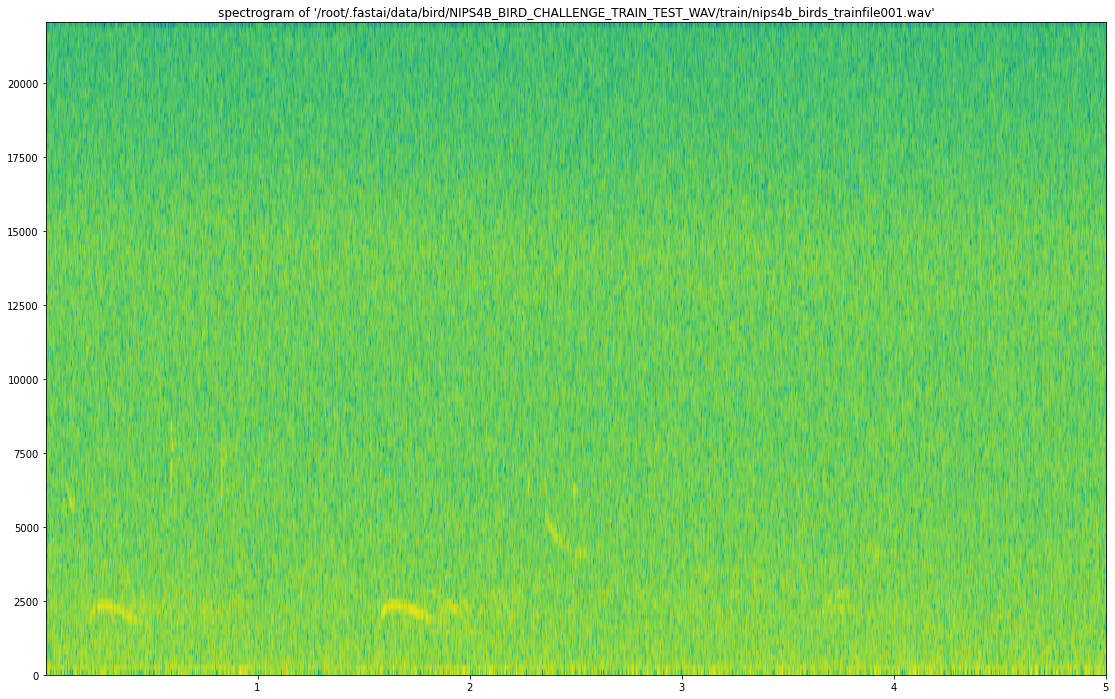

In [0]:
#A test to convert one wav to image  !!! Don't run! It doesn't show the image because I have modify the function WAV to PNG!!!
#It only convert the wav file to png image and save it in a specific path

graph_spectrogram("/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile001.wav","/root/.fastai/data/bird")

#### Create Images from WAV Training files

In [0]:
!mkdir '/root/.fastai/data/bird/PNG_training_images'

In [0]:
Listpath = ["/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/" + f for f in os.listdir("/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train")]

In [0]:
Listpath[:10]

['/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile611.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile404.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile401.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile303.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile416.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile614.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile440.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile293.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile328.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile

In [0]:
#We convert all wav in train directory to PNG image. It takes about 10 minutes.
for path in Listpath:
  graph_spectrogram(path,"/root/.fastai/data/bird/PNG_training_images")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


In [0]:
!ls /root/.fastai/data/bird/PNG_training_images | head -10 #First ten images converted from wav audio files

nips4b_birds_trainfile001.wav.png
nips4b_birds_trainfile002.wav.png
nips4b_birds_trainfile003.wav.png
nips4b_birds_trainfile004.wav.png
nips4b_birds_trainfile005.wav.png
nips4b_birds_trainfile006.wav.png
nips4b_birds_trainfile007.wav.png
nips4b_birds_trainfile008.wav.png
nips4b_birds_trainfile009.wav.png
nips4b_birds_trainfile010.wav.png


#### Creating Images from WAV Test files

In [0]:
!mkdir '/root/.fastai/data/bird/PNG_test_images'

In [0]:
ListpathTest = ["/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/" + f for f in os.listdir("/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test")]

In [0]:
ListpathTest[:10]

['/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0730.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0099.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0262.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0536.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0610.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0915.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0285.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0260.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0855.wav',
 '/root/.fastai/data/bird/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/test/nips4b_birds_testfile0813.wav']

In [0]:
for path in ListpathTest:  #It takes about 10 minutes.
  graph_spectrogram(path,"/root/.fastai/data/bird/PNG_test_images")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [0]:
!ls "/root/.fastai/data/bird/PNG_test_images" | tail -10

nips4b_birds_testfile0991.wav.png
nips4b_birds_testfile0992.wav.png
nips4b_birds_testfile0993.wav.png
nips4b_birds_testfile0994.wav.png
nips4b_birds_testfile0995.wav.png
nips4b_birds_testfile0996.wav.png
nips4b_birds_testfile0997.wav.png
nips4b_birds_testfile0998.wav.png
nips4b_birds_testfile0999.wav.png
nips4b_birds_testfile1000.wav.png


## **Creating Deep Learning model**

In [0]:
path = Config.data_path()/'bird' #Because the path was modified when we converted WAV audios to PNG images

In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.0, max_warp=0.)

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'label_training.csv', folder='PNG_training_images', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)  #I don't apply any kind of trasformation!!!
        .databunch().normalize(imagenet_stats))

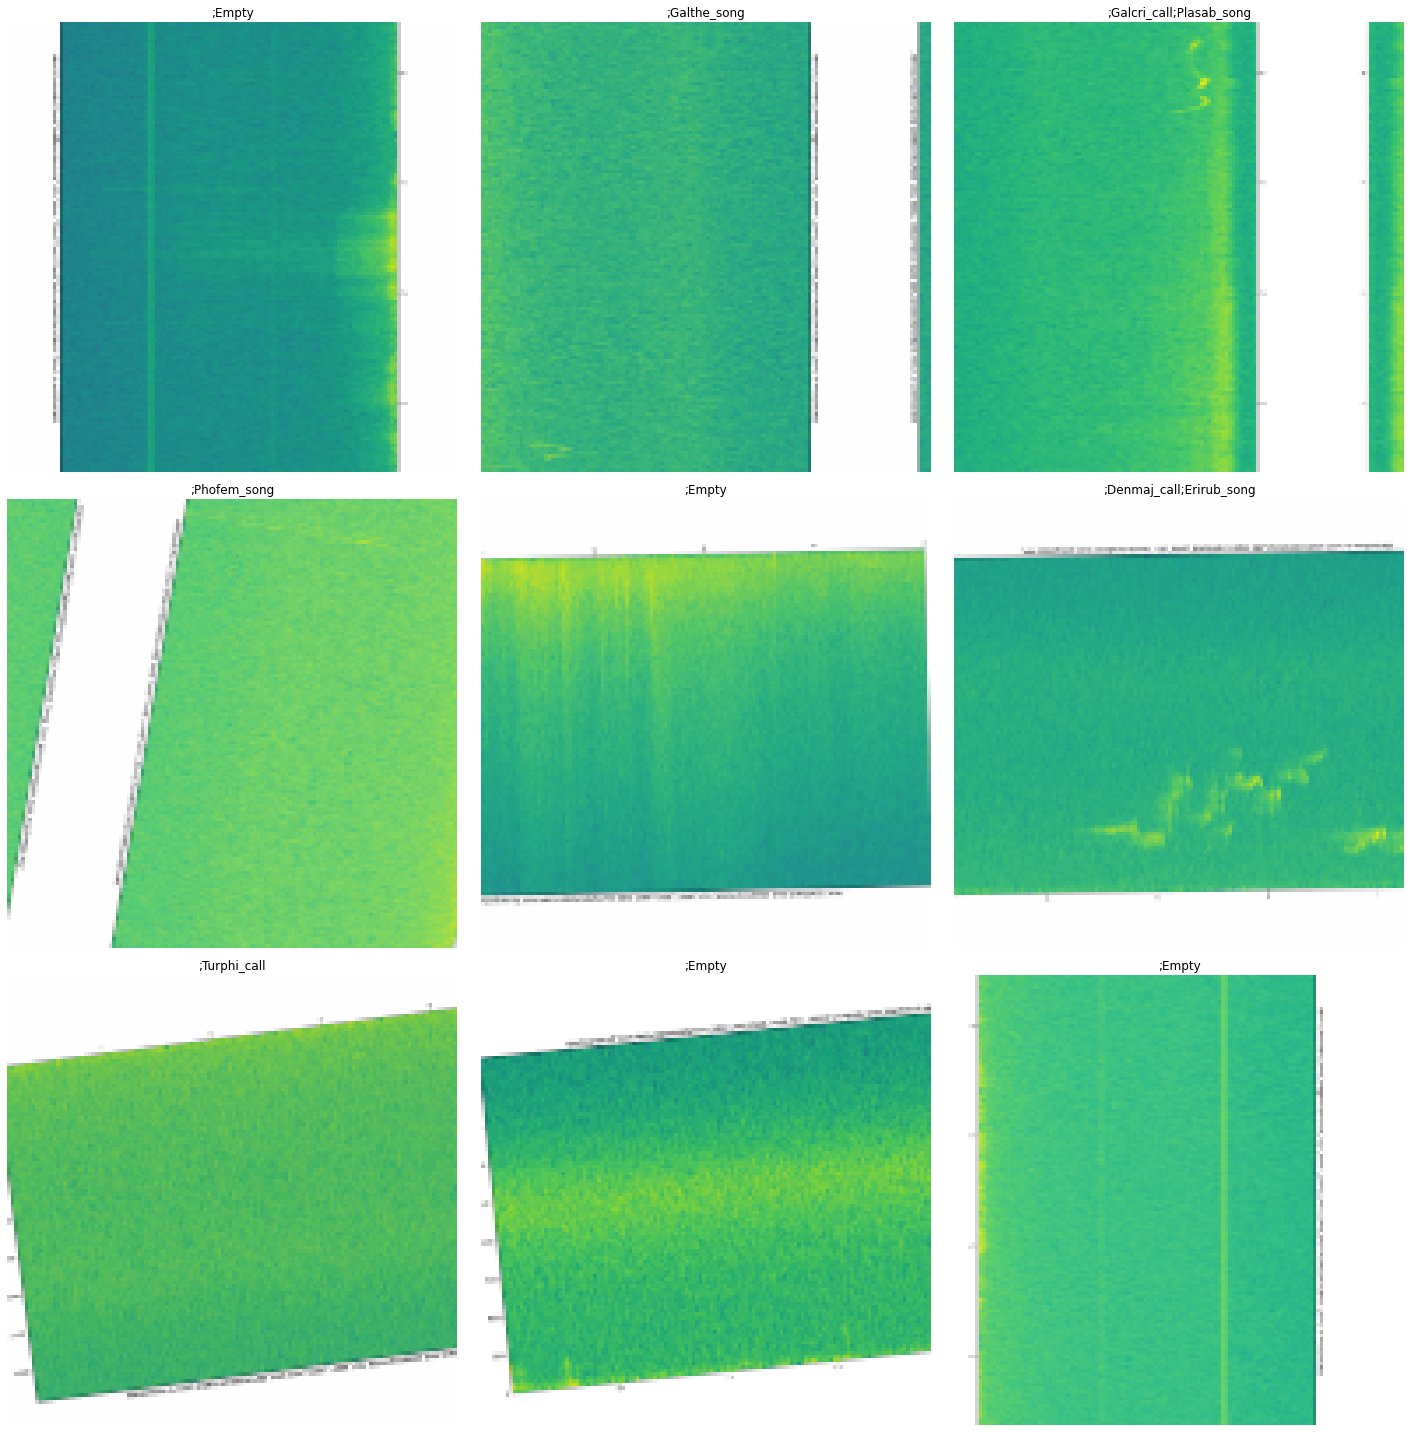

In [0]:
data.show_batch(rows=3, figsize=(20,20))


In [0]:
arch = models.resnet50

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


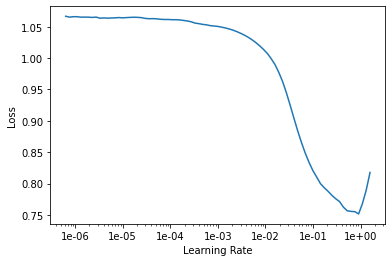

In [0]:
learn.recorder.plot()


In [0]:
learn.fit_one_cycle(10, slice(0.01))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,1.046510,0.754261,0.072665,0.138999,00:22
1,0.985754,0.776289,0.144837,0.140015,00:22
2,0.869982,0.420032,0.303945,0.162840,00:22
3,0.680634,0.107876,0.968342,0.431312,00:22
4,0.529318,0.115802,0.979086,0.441743,00:22
5,0.430834,0.107121,0.974658,0.489675,00:22
6,0.361904,0.100673,0.974822,0.485651,00:22
7,0.310266,0.097993,0.974822,0.478086,00:22
8,0.272377,0.096294,0.976544,0.484529,00:22
9,0.241641,0.095850,0.976790,0.484541,00:22


In [0]:
learn.save('resnet50_stage1')

#### Fine-Tuning:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


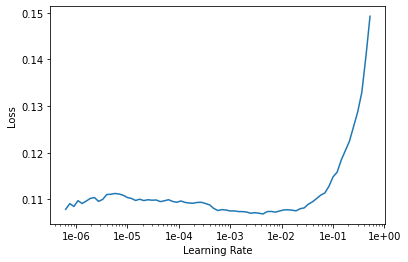

In [0]:
learn.unfreeze() # unfreeze all layers

learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate

In [0]:
learn.fit_one_cycle(5, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.110275,0.095460,0.978266,0.487261,00:22
1,0.106862,0.091105,0.977774,0.513282,00:22
2,0.105030,0.091748,0.977200,0.523933,00:22
3,0.103009,0.089872,0.976462,0.520995,00:22
4,0.101857,0.089037,0.977036,0.523030,00:22


In [0]:
learn.save('resnet50_stage2')

In [0]:
data = (src.transform(tfms, size=256)  #I don't apply any kind of trasformation!!!
        .databunch().normalize(imagenet_stats))

In [0]:
data.show_batch(rows=3, figsize=(20,20))

Output hidden; open in https://colab.research.google.com to view.

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


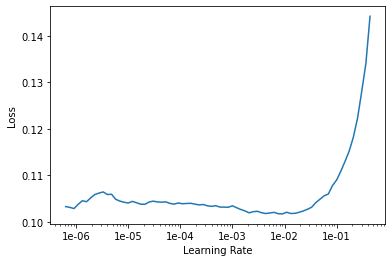

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.104851,0.093057,0.978676,0.455969,00:32
1,0.109314,0.109225,0.973099,0.506974,00:32
2,0.109825,0.101880,0.971377,0.498608,00:32
3,0.107277,0.096942,0.972443,0.510735,00:32
4,0.104361,0.095343,0.976052,0.506137,00:32


In [0]:
learn.save('resnet50_256_stage1')

## **Predicting the Test Images and Kaggle submission**

In [0]:
learn.load('resnet50_stage2')   #We load the weights with best perfomances

Learner(data=ImageDataBunch;

Train: LabelList (550 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
;Butbut_call;Erirub_call;Parate_call,;Sylmel_song,;Erirub_call;Prumod_song;Turmer_call,;Erirub_call;Prumod_song;Turmer_call,;Phofem_song;Tetpyg_song
Path: /root/.fastai/data/bird;

Valid: LabelList (137 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
;Petpet_call;Sylcan_song,;Petpet_song;Sylcan_call;Sylcan_song,;Cicatr_song;Serser_song;Strdec_song,;Carcan_call,;Denmaj_call;Parate_call;Parate_song;Phycol_song
Path: /root/.fastai/data/bird;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d

In [0]:
!ls /root/.fastai/data/bird/

label_training.csv
models
NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS
NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV
NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz
PNG_test_images
PNG_training_images


In [0]:
data.add_test(ImageList.from_folder('/root/.fastai/data/bird/PNG_test_images'))

In [0]:
preds,y = learn.get_preds(DatasetType.Test)

In [0]:
preds_tta, _ = learn.TTA(ds_type=DatasetType.Test)

In [0]:
(preds.shape, preds_tta.shape)  #We have a 89 predictions (one for each label) for each image

(torch.Size([1000, 89]), torch.Size([1000, 89]))

In [0]:
preds

tensor([[9.9913e-01, 5.4799e-03, 6.6790e-03,  ..., 5.8395e-03, 1.0468e-03,
         5.1446e-03],
        [9.9697e-01, 1.0198e-02, 4.0175e-02,  ..., 1.8161e-02, 3.4431e-03,
         4.7621e-02],
        [9.9945e-01, 1.2325e-03, 4.0812e-02,  ..., 2.0483e-03, 8.5300e-05,
         1.9155e-03],
        ...,
        [9.9938e-01, 3.3391e-03, 8.9237e-03,  ..., 2.0496e-03, 2.0563e-02,
         2.9913e-02],
        [9.9926e-01, 8.9207e-03, 6.0963e-03,  ..., 6.0574e-03, 2.6744e-02,
         3.5496e-02],
        [9.9828e-01, 1.7023e-02, 1.0583e-02,  ..., 2.0061e-02, 3.7726e-03,
         3.9120e-02]])

In [0]:
preds_tta

tensor([[0.9993, 0.0052, 0.0064,  ..., 0.0042, 0.0017, 0.0042],
        [0.9978, 0.0105, 0.0234,  ..., 0.0209, 0.0096, 0.0330],
        [0.9991, 0.0036, 0.0257,  ..., 0.0120, 0.0014, 0.0074],
        ...,
        [0.9993, 0.0033, 0.0046,  ..., 0.0027, 0.0222, 0.0222],
        [0.9992, 0.0055, 0.0038,  ..., 0.0045, 0.0238, 0.0240],
        [0.9984, 0.0139, 0.0068,  ..., 0.0129, 0.0072, 0.0227]])

In [0]:
learn.data.classes[:10]  #With preds and preds_tta we have all images with highest probability for "" class!!! Why????

['',
 'Aegcau_call',
 'Alaarv_song',
 'Anttri_song',
 'Butbut_call',
 'Carcan_call',
 'Carcan_song',
 'Carcar_call',
 'Carcar_song',
 'Cerbra_call']